In [1]:
from IPython.display import display, Image
from pprint import pprint

from janet import *
sympy.init_printing()

In [2]:
var = 'a, b, c, d, e'.split(', ')
fun = 'u, v, w'.split(', ')
var, fun = Poly.init(var, fun)
a, b, c, d, e = var
u, v, w = fun

In [3]:
Monom.cmp = Monom.POTlex

In [4]:
alpha, beta, tau = sympy.symbols('alpha, beta, tau', real=True)
display(alpha*beta**5 - 5*tau)
h = u*c**5 + e*a*b*tau*1236537 + d*alpha
print(h)
print(f"{h!r}")

u*c**5 + a*b*e*1236537*tau + d*alpha
[[[0;0 0 5 0 0], 1], [[1 1 0 0 1], 1236537*tau], [[0 0 0 1 0], alpha]]


In [5]:
w1 = Wrap(h)
w1.nonmult[3] = True
w2 = Wrap(w1, 3)
w2.nonmult[4] = True

In [6]:
w1

      id: 0
ansector: [0;0 0 5 0 0]
      lm: [0;0 0 5 0 0]
 prolong: _ _ _ * _
 nonmult: _ _ _ * _
    poly: [[[0;0 0 5 0 0], 1], [[1 1 0 0 1], 1236537*tau], [[0 0 0 1 0], alpha]]

In [7]:
print(f"{w1}")

      id: 0
ansector: u*c**5
      lm: u*c**5
 prolong: _ _ _ * _
 nonmult: _ _ _ * _
    poly: u*c**5 + a*b*e*1236537*tau + d*alpha


In [8]:
print(f"{w1!r}")

      id: 0
ansector: [0;0 0 5 0 0]
      lm: [0;0 0 5 0 0]
 prolong: _ _ _ * _
 nonmult: _ _ _ * _
    poly: [[[0;0 0 5 0 0], 1], [[1 1 0 0 1], 1236537*tau], [[0 0 0 1 0], alpha]]


In [9]:
for i in range(7):
    print(i, CombRepet(6, 3).subs(i))

0 0
1 0
2 0
3 1
4 6
5 21
6 56


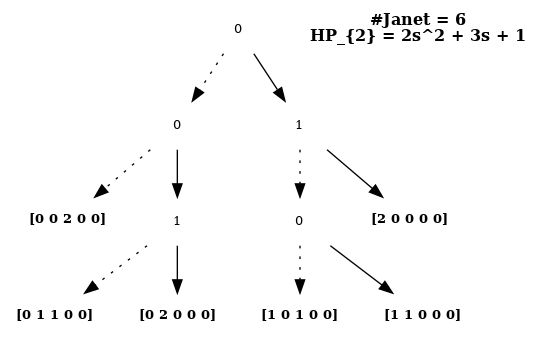

In [10]:
var = 'a, b, c, d, e'.split(', ')
var = Poly.init(var)
a, b, c, d, e = var
pommaret = Janet()
q = pommaret.insert(Wrap(p) for p in (\
a**2, a*b, b**2, a*c, b*c, c**2))
assert q == []
pommaret.saveImage('pommaret.png')
pommaret.saveImage('pommaret.pdf')
Image('./pommaret.png')

In [11]:
pommaret.find(Monom((0, 3, 3, 0, 0)))

[[[0 2 0 0 0], 1]]

In [12]:
assert pommaret.degMinProlong() == 2
q = pommaret.prolongDeg(2)
print(len(q))
[w for w in q if not pommaret.find(w.lm)]

8


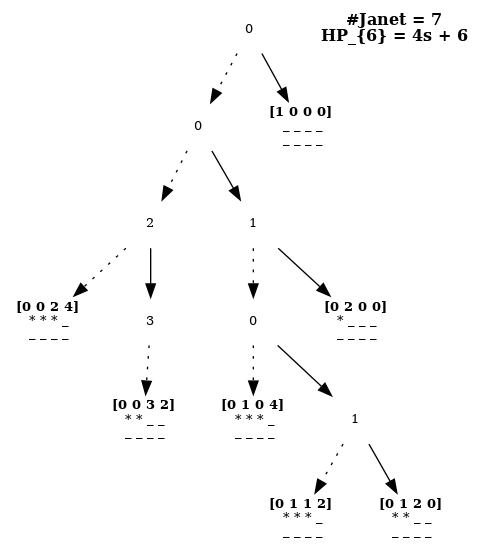

In [13]:
var = 'a, b, c, d'.split(', ')
var = Poly.init(var)
a, b, c, d = var
cyclic4 = Janet()
q = cyclic4.insert(Wrap(p) for p in (\
a, b**2, b*c**2, b*c*d**2,\
b*d**4, c**2*d**4, c**3*d**2))
assert q == []
cyclic4.saveImage('cyclic4.png', level=2)
cyclic4.saveImage('cyclic4.pdf', level=2)
Image('./cyclic4.png')

In [14]:
for i in range(2, 7):
    assert cyclic4.degMinProlong() == i
    q = cyclic4.prolongDeg(i)
    print(f"prolong {i}, len({len(q)}), {[w for w in q if not cyclic4.find(w.lm)]}")

prolong 2, len(1), []
prolong 3, len(2), []
prolong 4, len(3), []
prolong 5, len(5), []
prolong 6, len(3), []


[      id: 21
ansector: [0 0 2 4]
      lm: [0 0 2 4]
 prolong: * * * _
 nonmult: * * * _
    poly: [[[0 0 2 4], 1]],
       id: 22
ansector: [0 0 3 2]
      lm: [0 0 3 2]
 prolong: * * _ _
 nonmult: * * _ _
    poly: [[[0 0 3 2], 1]]]


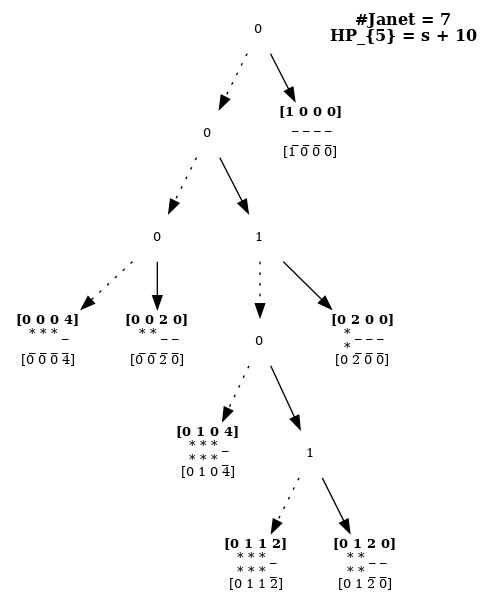

In [15]:
lst = [Wrap(p) for p in (c**2, d**4)]
q = cyclic4.insert(lst)
pprint(q)
cyclic4.saveImage('cyclic41.png', level=3)
cyclic4.saveImage('cyclic41.pdf', level=3)
Image('./cyclic41.png')

[]


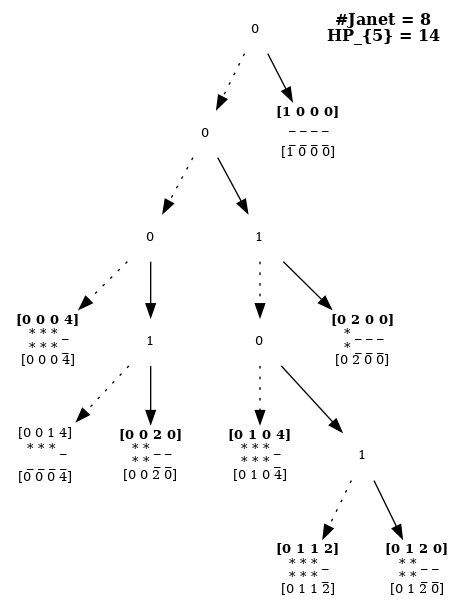

In [16]:
lst1 = [Wrap(lst[0], 0), Wrap(lst[0], 1),\
    Wrap(lst[1], 0), Wrap(lst[1], 1), Wrap(lst[1], 2)]
q = cyclic4.insert([w for w in lst1 if not cyclic4.find(w.lm)])
pprint(q)
cyclic4.saveImage('cyclic42.png', level=3)
cyclic4.saveImage('cyclic42.pdf', level=3)
Image('./cyclic42.png')

[]


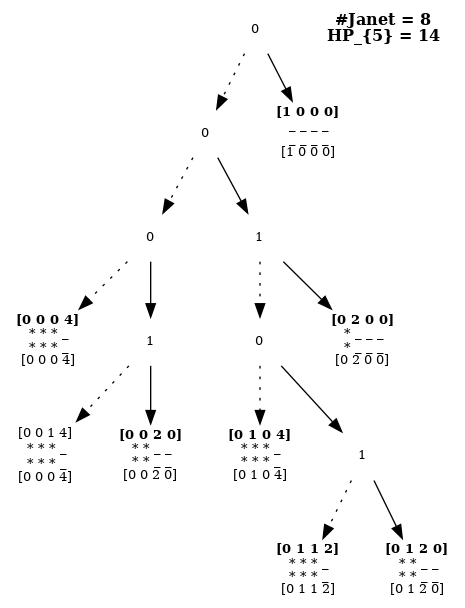

In [17]:
lst2 = [Wrap(lst1[-1], 0), Wrap(lst1[-1], 1), Wrap(lst1[-1], 2)]
q = cyclic4.insert([w for w in lst2 if not cyclic4.find(w.lm)])
pprint(q)
cyclic4.saveImage('cyclic43.png', level=3)
cyclic4.saveImage('cyclic43.pdf', level=3)
Image('./cyclic43.png')

In [18]:
var = 'a, b, c'.split(', ')
var = Poly.init(var)
a, b, c = var
Monom.cmp = Monom.TOPdeglex
perm3 = Janet()
q = perm3.insert(Wrap(p) for p in (a**3, b**3, c**3))
assert q == []

In [19]:
for i in range(3, 8):
    print(perm3.degMinProlong())
    assert perm3.degMinProlong() == i
    q = perm3.prolongDeg(i)
    print(f"prolong {i}")
    pprint(q)
    perm3.insert(w for w in q if not perm3.find(w.lm))

3
prolong 3
[      id: 50
ansector: [0 0 3]
      lm: [1 0 3]
 prolong: _ _ _
 nonmult: _ _ _
    poly: [[[1 0 3], 1]],
       id: 51
ansector: [0 0 3]
      lm: [0 1 3]
 prolong: _ _ _
 nonmult: _ _ _
    poly: [[[0 1 3], 1]],
       id: 52
ansector: [0 3 0]
      lm: [1 3 0]
 prolong: _ _ _
 nonmult: _ _ _
    poly: [[[1 3 0], 1]]]
4
prolong 4
[      id: 53
ansector: [0 0 3]
      lm: [1 1 3]
 prolong: _ _ _
 nonmult: _ _ _
    poly: [[[1 1 3], 1]],
       id: 54
ansector: [0 0 3]
      lm: [0 2 3]
 prolong: _ _ _
 nonmult: _ _ _
    poly: [[[0 2 3], 1]],
       id: 55
ansector: [0 0 3]
      lm: [2 0 3]
 prolong: _ _ _
 nonmult: _ _ _
    poly: [[[2 0 3], 1]],
       id: 56
ansector: [0 0 3]
      lm: [1 1 3]
 prolong: _ _ _
 nonmult: _ _ _
    poly: [[[1 1 3], 1]],
       id: 57
ansector: [0 3 0]
      lm: [2 3 0]
 prolong: _ _ _
 nonmult: _ _ _
    poly: [[[2 3 0], 1]]]
5
prolong 5
[      id: 58
ansector: [0 0 3]
      lm: [1 2 3]
 prolong: _ _ _
 nonmult: _ _ _
    poly: [[[1 2 3

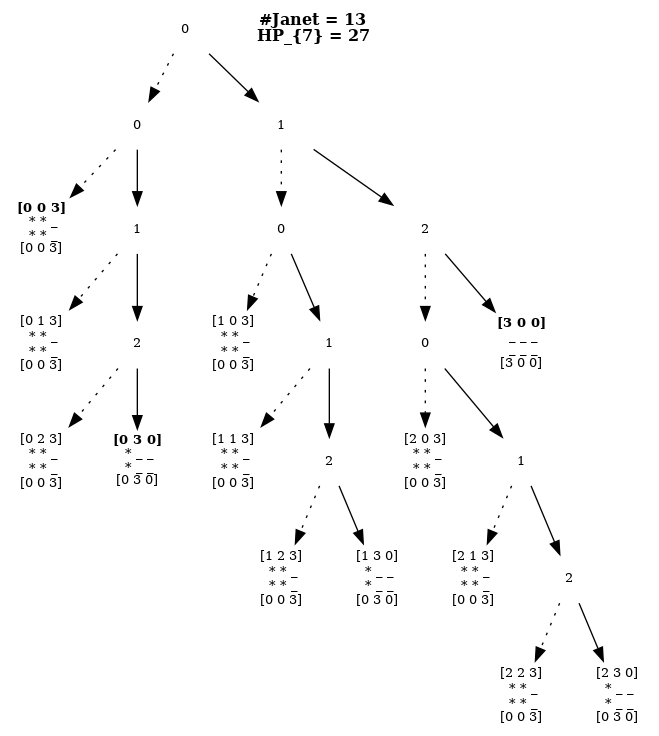

In [20]:
perm3.saveImage('perm3.png', level=3)
perm3.saveImage('perm3.pdf', level=3)
Image('./perm3.png')

In [21]:
for w in perm3:
    if w.lm == w.ansector:
        print()
        print(w)


      id: 49
ansector: c**3
      lm: c**3
 prolong: * * _
 nonmult: * * _
    poly: c**3

      id: 48
ansector: b**3
      lm: b**3
 prolong: * _ _
 nonmult: * _ _
    poly: b**3

      id: 47
ansector: a**3
      lm: a**3
 prolong: _ _ _
 nonmult: _ _ _
    poly: a**3


In [22]:
perm3.find(Monom((3, 3, 3)))

[[[3 0 0], 1]]

In [23]:
perm3.find(Monom((2, 3, 3)))

[[[2 3 0], 1]]

In [24]:
perm3.find(Monom((2, 2, 3)))

[[[2 2 3], 1]]

In [25]:
perm3.find(Monom((2, 2, 2)))

In [26]:
Monom.cmp = Monom.TOPdeglex
x, y = Poly.init('x, y'.split(', '))
моnоmial = Janet()
моnоmial.insert(Wrap(p) for p in (x**7*y, x**5*y**2, x**4*y**3, x**2*y**4))

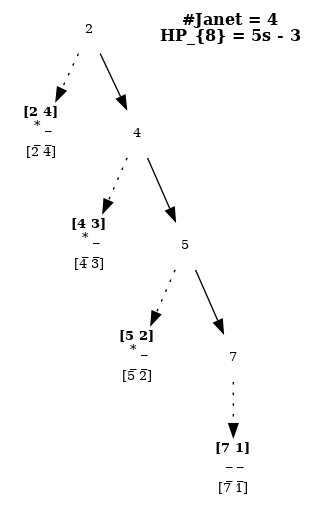

In [27]:
моnоmial.saveImage('monomial.png', level=3)
Image('./monomial.png')

In [28]:
моnоmial.insert([Wrap(x**0)])

[      id: 74
 ansector: [2 4]
       lm: [2 4]
  prolong: _ _
  nonmult: * _
     poly: [[[2 4], 1]],
       id: 73
 ansector: [4 3]
       lm: [4 3]
  prolong: _ _
  nonmult: * _
     poly: [[[4 3], 1]],
       id: 72
 ansector: [5 2]
       lm: [5 2]
  prolong: _ _
  nonmult: * _
     poly: [[[5 2], 1]],
       id: 71
 ansector: [7 1]
       lm: [7 1]
  prolong: _ _
  nonmult: _ _
     poly: [[[7 1], 1]]]

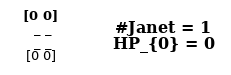

In [29]:
моnоmial.saveImage('monomial1.png', level=3)
Image('./monomial1.png')